<h1 style="text-align: center;">Seaborn Exercises</h1>

### 1) Load & visualize: `tips` scatter
Dataset: sns.load_dataset('tips')

Task: Create a scatter plot of total_bill vs tip. Color points by time and use different markers for sex. Add axis labels and a title.

Bonus: Add a regression line for each time (lunch/dinner) on the same axes.


In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
tips = sns.load_dataset('tips')

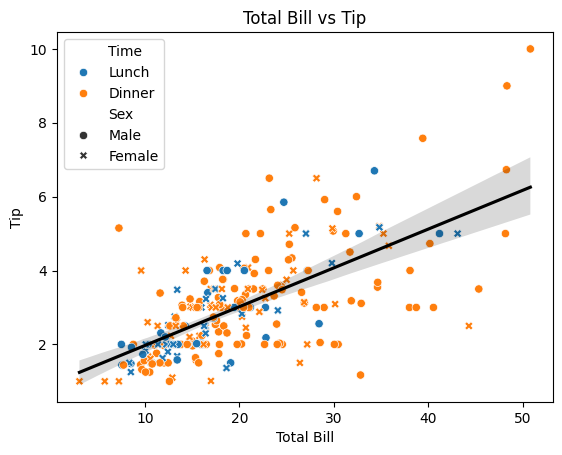

In [31]:
ax = sns.scatterplot(data=tips, x='total_bill', y='tip', hue='time', style='sex')
sns.regplot(x="total_bill", y="tip", data=tips, scatter=False, color="black")
legend = ax.legend_
legend.get_texts()[0].set_text("Time")
legend.get_texts()[3].set_text("Sex") 
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.title("Total Bill vs Tip")

plt.show()

### 2) Distribution + NumPy: histogram & KDE
Dataset: tips (use total_bill)

Task: Using numpy, compute a log-transformed version of total_bill (np.log1p). Plot its histogram and KDE on the same axes. Briefly state whether the transform made the distribution more symmetric.

Bonus: Overlay a rug plot.


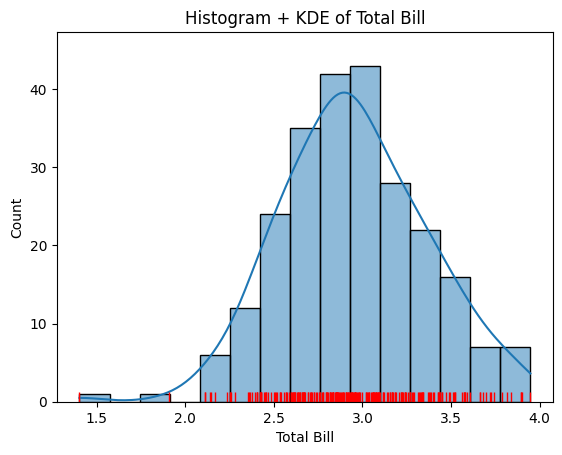

In [60]:
total_bill_LTV = np.log1p(tips['total_bill'])

ax = sns.histplot(data=total_bill_LTV, kde=True, fill=True)
sns.rugplot(total_bill_LTV, color="red")
plt.xlabel('Total Bill')
ax.set_title('Histogram + KDE of Total Bill')
plt.show()

### 3) Categorical aggregation: barplot with pandas groupby
Dataset: titanic

Task: Using pandas, group by class and compute the survival rate; show a bar plot of survival rate per class. Annotate bars with percentages.

Bonus: Split bars by sex using hue.


In [62]:
titanic = sns.load_dataset('titanic')

In [67]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


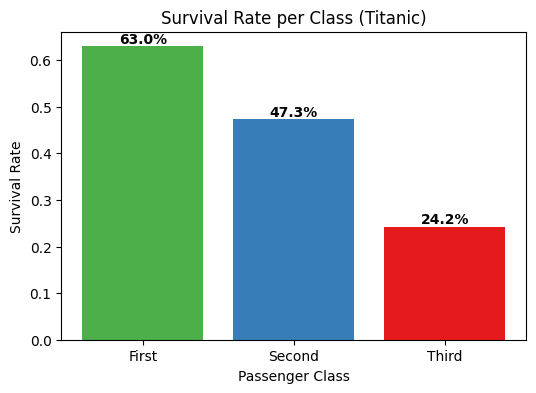

In [79]:
survival_rate = titanic.groupby("class", observed=False)["survived"].mean().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(6,4))
bars = ax.bar(survival_rate.index, survival_rate.values, color=["#4daf4a","#377eb8","#e41a1c"])
ax.set_xlabel("Passenger Class")
ax.set_ylabel("Survival Rate")
ax.set_title("Survival Rate per Class (Titanic)")

for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2,
        height,                            
        f"{height*100:.1f}%",
        ha="center", va="bottom", fontsize=10, fontweight="bold"
    )
plt.show()

### 4) Pairwise relationships: pairplot vs PairGrid
Dataset: iris

Task:  
 a) Produce sns.pairplot(iris, hue='species').  
 b) Create the same using PairGrid with scatterplots in the upper triangle and KDEs on the diagonal. Explain one     advantage of PairGrid.


In [80]:
iris = sns.load_dataset('iris')

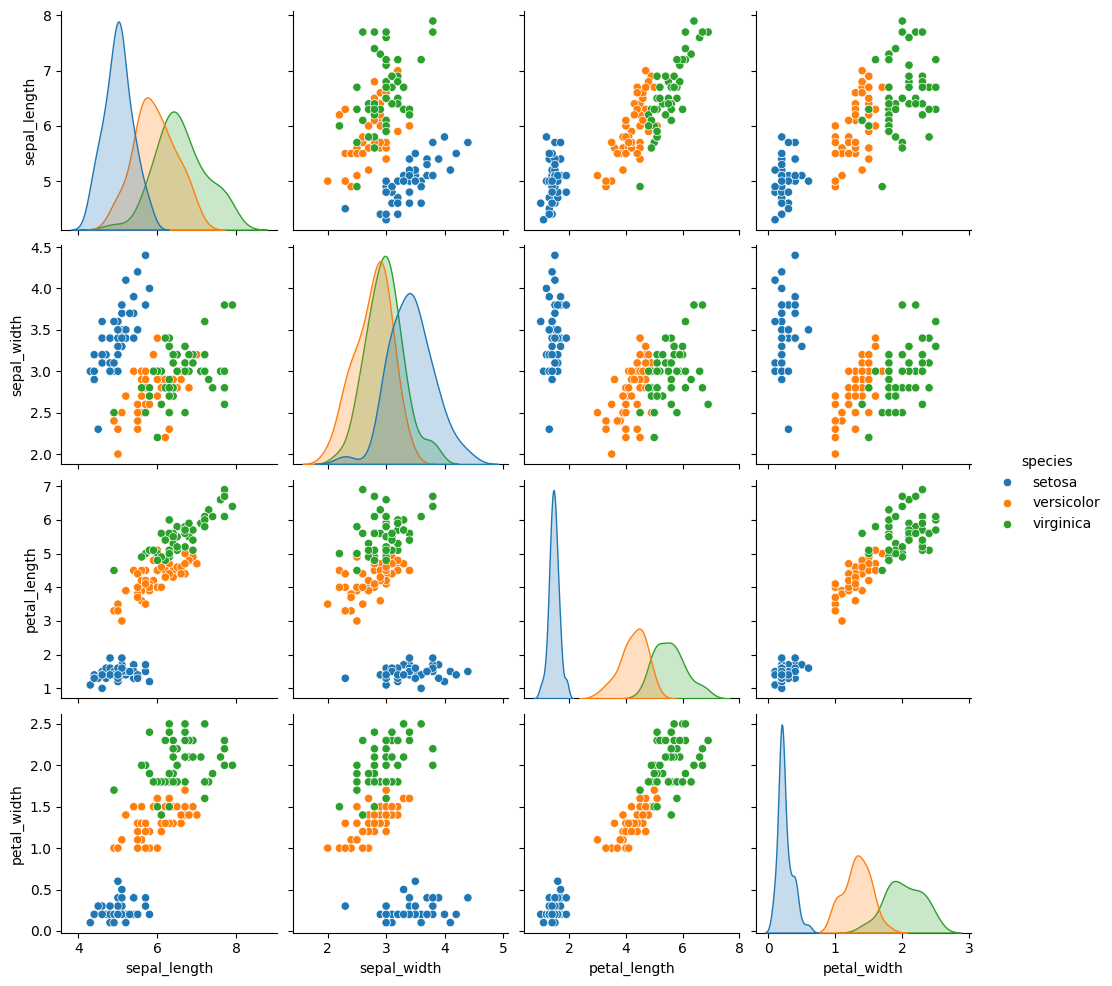

In [83]:
sns.pairplot(iris, hue='species')

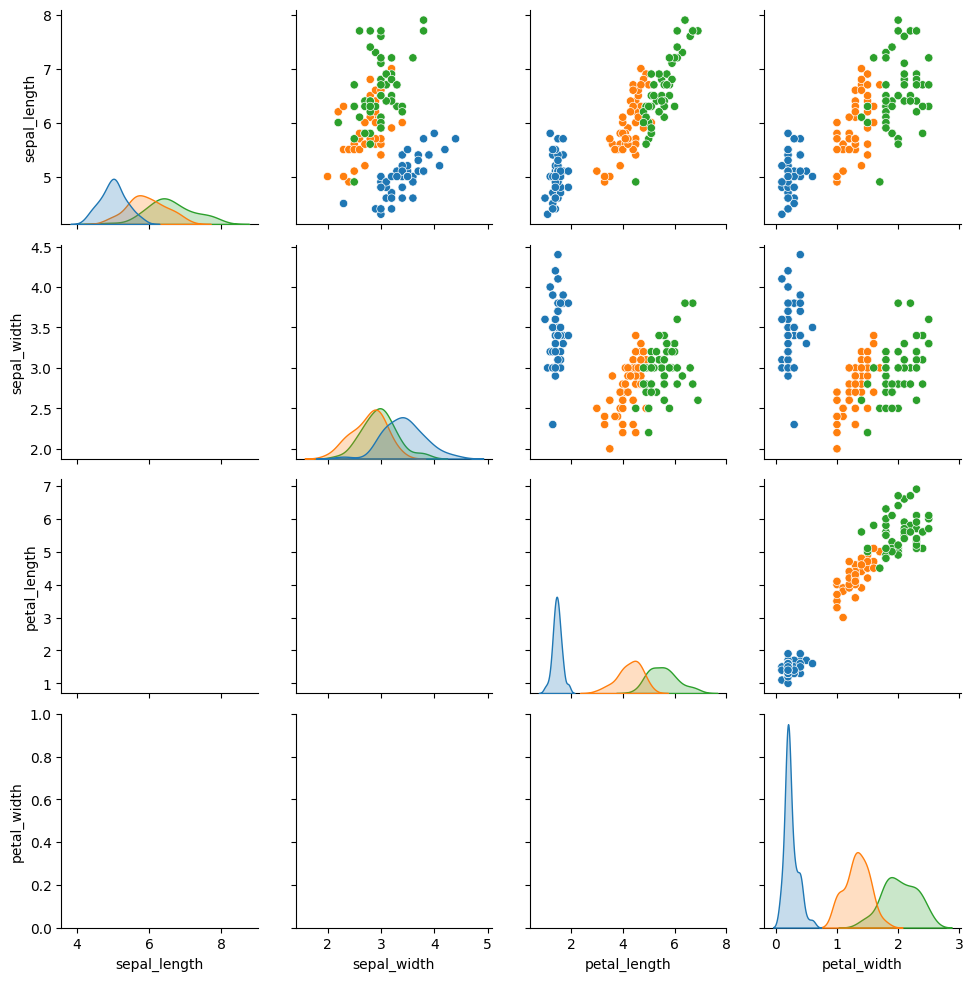

In [88]:
g = sns.PairGrid(iris, hue='species')
g.map_upper(sns.scatterplot)
g.map_diag(sns.kdeplot, fill=True)

### 5) Time-series & heatmap: flights pivot
Dataset: flights (year, month, passengers)

Task: Pivot into a month x year matrix and plot a heatmap with annotations and colorbar. Interpret the main pattern you observe.

Bonus: Ensure months appear in chronological order.


In [89]:
flights = sns.load_dataset('flights')

<Axes: xlabel='year', ylabel='month'>

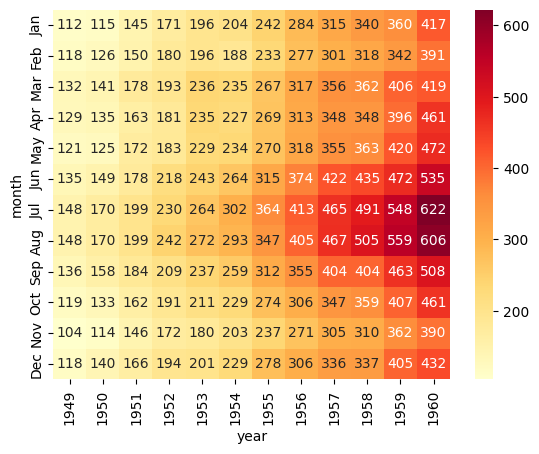

In [104]:
flights_pivot = flights.pivot(index="month", columns="year", values="passengers")

sns.heatmap(flights_pivot, annot=True, fmt="d", cmap="YlOrRd", cbar=True)

### 6) Regression with groups & matplotlib tweak
Dataset: mpg (model_year, mpg, origin)

Task: For each origin, plot a linear regression (mpg vs model_year) on the same axes with different line styles. Add a legend outside the plot and a vertical dashed line at the median model year.

Bonus: Compute and display the slope for each origin as text on the plot.


In [111]:
mpg = sns.load_dataset('mpg')

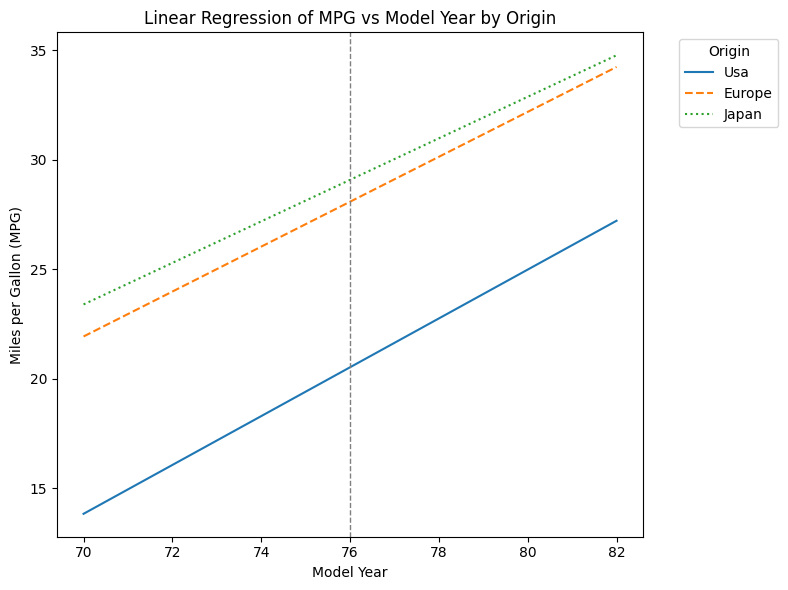

In [154]:
fig, ax = plt.subplots(figsize=(8,6))
line_styles = {"usa": "-", "europe": "--", "japan": ":"}

# Loop through each origin and fit regression
for origin, style in line_styles.items():
    # Subset
    data = mpg[mpg["origin"] == origin]
    
    # Fit linear regression (mpg ~ model_year)
    slope, intercept = np.polyfit(data["model_year"], data["mpg"], 1)
    
    # Generate regression line
    x_vals = np.linspace(data["model_year"].min(), data["model_year"].max(), 100)
    y_vals = intercept + slope * x_vals
    
    # Plot regression line
    ax.plot(x_vals, y_vals, style, label=origin.title())

# Add vertical dashed line at median year
median_year = mpg["model_year"].median()
ax.axvline(median_year, color="gray", linestyle="--", linewidth=1)

# Labels & title
ax.set_xlabel("Model Year")
ax.set_ylabel("Miles per Gallon (MPG)")
ax.set_title("Linear Regression of MPG vs Model Year by Origin")

# Legend outside
ax.legend(title="Origin", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()